In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
X = df.drop('sales', axis=1)
y = df['sales']

In [7]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [22]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
polyConverter = PolynomialFeatures(degree=2, include_bias=False)

In [25]:
polyConverter.fit(X)

PolynomialFeatures(include_bias=False)

In [26]:
polyFeatures = polyConverter.transform(X)

In [27]:
polyConverter.transform(X).shape

(200, 9)

In [28]:
X.shape

(200, 3)

In [29]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [30]:
polyFeatures[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(polyFeatures,y, test_size=0.33, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
testPredictions = model.predict(X_test)

In [37]:
model.coef_

array([ 5.49298090e-02,  1.42197827e-02,  1.16916818e-02, -1.12988475e-04,
        1.08937883e-03, -1.01342723e-04,  2.76385341e-04,  1.44165732e-04,
        8.99438936e-05])

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
MAE = mean_absolute_error(y_test, testPredictions)
MSE = mean_squared_error(y_test, testPredictions)
RMSE = np.sqrt(MSE)

In [40]:
MAE, MSE, RMSE

(0.5475837919149522, 0.4603062493888078, 0.6784587307926753)

In [41]:
model.coef_

array([ 5.49298090e-02,  1.42197827e-02,  1.16916818e-02, -1.12988475e-04,
        1.08937883e-03, -1.01342723e-04,  2.76385341e-04,  1.44165732e-04,
        8.99438936e-05])

In [42]:
polyFeatures[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [43]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [44]:
69.3**2

4802.49

In [45]:
# Create the differnet order polynomial
# Split out poly features train/test
# Fit on train
# Store/save the RMSE for BOTH the train AND TEST
# Plot the results (error vs poly degree order)

In [47]:
trainRmseErrors = []
testRmseErrors = []

for d in range(1, 10):
    
    polyConverter = PolynomialFeatures(degree=d,include_bias=False)
    polyFeatures = polyConverter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(polyFeatures,y, test_size=0.33, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    trainPred = model.predict(X_train)
    testPred = model.predict(X_test)
    
    trainRMSE = np.sqrt(mean_squared_error(y_train, trainPred))
    testRMSE = np.sqrt(mean_squared_error(y_test, testPred))
    
    trainRmseErrors.append(trainRMSE)
    testRmseErrors.append(testRMSE)

In [48]:
trainRmseErrors

[1.5526939990087727,
 0.6057702019226607,
 0.47568472931843475,
 0.3742987908933803,
 0.2410875755644311,
 0.1990639451893554,
 3.5739344326938065,
 0.1153634570692934,
 0.11410390496534749]

In [49]:
testRmseErrors

[1.9307843822347195,
 0.6784587307926753,
 0.5148267621823459,
 1.2750589564576935,
 6.410701085932162,
 24.835522245614566,
 549.080153542527,
 8555.197957547662,
 184418.2845932742]

In [50]:
# That's a huge spike!

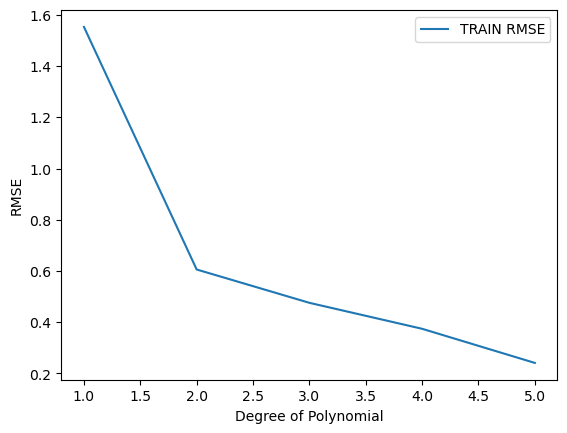

In [52]:
plt.plot(range(1,6), trainRmseErrors[:5], label="TRAIN RMSE")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.legend()

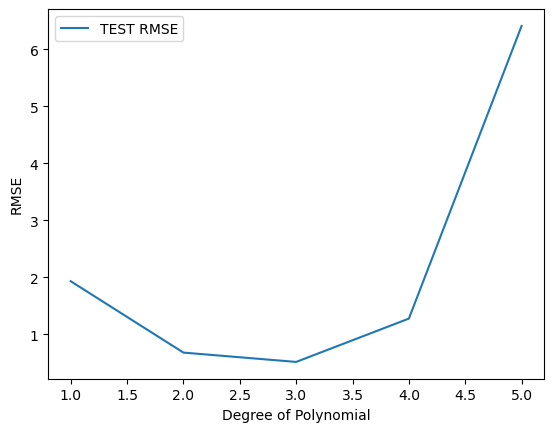

In [53]:
plt.plot(range(1,6), testRmseErrors[:5], label="TEST RMSE")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.legend()

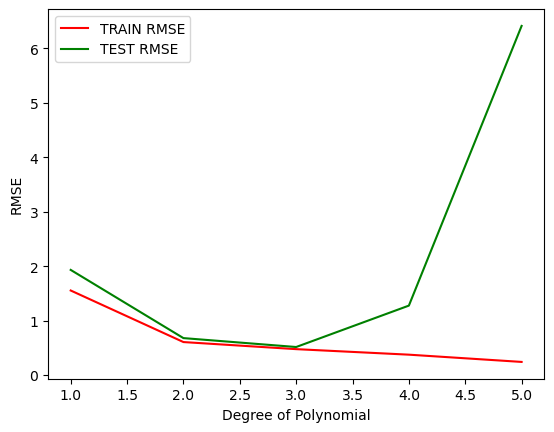

In [59]:
plt.plot(range(1,6), trainRmseErrors[:5], label="TRAIN RMSE", color='red')
plt.plot(range(1,6), testRmseErrors[:5], label="TEST RMSE", color='green')

plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.legend()

In [65]:
finalPolyConverter = PolynomialFeatures(degree=2.5, include_bias=False)

In [66]:
finalModel = LinearRegression()

In [68]:
fullConvertedX = finalPolyConverter.fit_transform(X)
finalModel.fit(fullConvertedX, y)

LinearRegression()

In [69]:
from joblib import dump, load

In [70]:
dump(finalModel, 'FinalPolyModel.joblib')

['FinalPolyModel.joblib']

In [71]:
dump(finalPolyConverter, 'FinalPolyConverter.joblib')

['FinalPolyConverter.joblib']

In [72]:
loadedConverter = load('finalPolyConverter.joblib')
loadedModel = load('finalPolyModel.joblib')

In [73]:
campaign = [[149,22,12]]

In [78]:
transformedData = loadedConverter.fit_transform(campaign)

In [79]:
loadedModel.predict(transformedData)

array([14.64501014])